In [1]:
from adjustable import *
from qsp import *
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.exp(-(x-1/2)**2)

### Adjustable-depth diagonal unitary

Adjustable-depth(n=3,m=0,p=0)


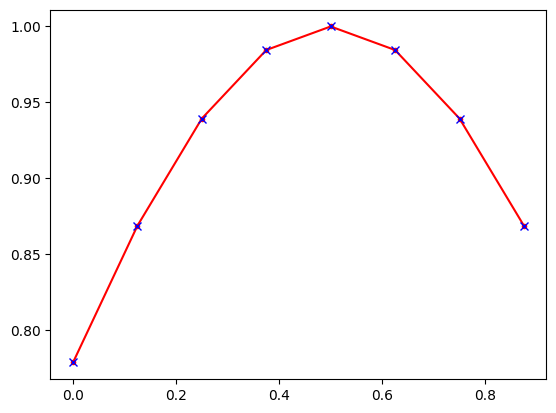

In [3]:
n = 3
m = 0 # m = 0,...,n-p-1
p = 0 # p = 0,...,n-1

diag = adjustable_depth_diagonal(n,m,p,f)
state = qi.Statevector.from_instruction(diag)

L = np.array(state.data[0:2**n])
L2 = np.angle(L)
newL2 = reordering(L2,n,p)
X = np.array(range(2**n))/2**n

plt.plot(X,newL2,marker='.',c='r')
plt.plot(X,f(X),marker='x',c='b',linestyle='')
plt.show()

### Adjustable-depth QSP

Adjustable-depth QSP(n=3,m=0,p=0)


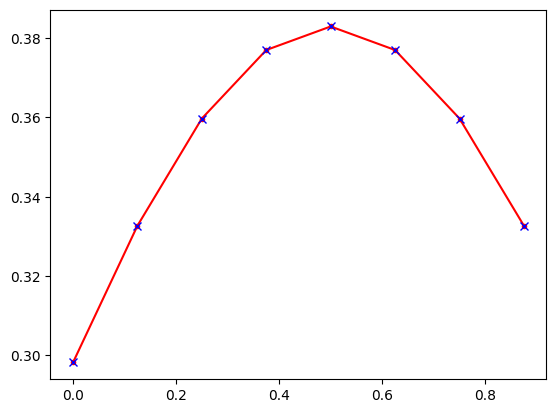

In [10]:
n = 3
m = 0 # m = 0,...,n-p-1
p = 0 # p = 0,...,n-1
eps0 = 0.001

qsp = adjustable_depth_qsp(n,m,p,eps0,f)
state = qi.Statevector.from_instruction(qsp)

L = np.array(state.data[0:2**n])/np.linalg.norm(state.data[0:2**n])
newL = reordering(L,n,p)
X = np.array(range(2**n),dtype=complex)/2**n
target_state = np.array(f(X),dtype=complex)/norm(f,2**n)
plt.plot(X,newL,marker='.',c='r')
plt.plot(X,target_state,marker='x',c='b',linestyle='')
plt.show()